# 1 | SGDRegressor

<img src = "https://adataanalyst.com/wp-content/uploads/2016/07/Regression_in_scikit-learn-1.png">

First of all lets understand what the hell is this `Regression`???

**What** - `Regression` is just like the lost brother of `classification`. In `classification` we have `discrete` or `particular values`, that we want to `classify`, In `regression` we have `continuous values`, that we want to `predict`

| Classification |Regression |
| --- | --- |
|  We have discrete values| We have continuous values |
|Usually we know these values in depth | We usually don't know these values in depth|
|These are comparatively less in number| These are comparatively more in number |

# 2 | What other things we will learn here
* Slope of Function
* Baisc Diffrentiation
* Intercept 

**Why** - Regression is a very useful method and is used in many places to predict values.

**How** - There are many different techniques to perform this operation. 

**I highly encourage you to find different methods by yourself too, and can even try to build your own models, maybe your brain pushes the boundaries of machine learning**

So now we have a basic idea of what regression is, our next move should be knowing about Sochastic Gradient Descent Regressor 

So what is this `SGDRegressor`


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import IFrame
import seaborn as sns

Lets assume we have data like this

In [2]:
features = np.array([x for x in range(0 , 200 , 1)])

In [3]:
features

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
target = np.array([x for x in range(0 , 400 , 2)])

In [5]:
target

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

Lets assume there is a connection between the `target` , and `features`. By human instacne we know that every element in `target` is just a double of the corresponding element in `features`, or $target  = 2XFeatures$. 

Lets assume we change the target a little bit...

In [6]:
target = np.array([x + 1 for x in range(0 , 400 , 2)])

In [7]:
target

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285,
       287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311,
       313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337,
       339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 36

Now what could be the trend here..., We can see the code above and with the help of that we can say. That `target` value is just the `double + 1` of the corresponding element in `features`. or $target = 2Xfeatures + 1$

Till now the problem was really easy to solve, and thats why we used the brain only, But these are just examples. As we move closer to the real world. The examples/problems get difficulat and we find it harder to find proper trends in the two `arrays`. Thats we try to teach machine, how to find trend in the data. The formula we had before $target = 2Xfeature + 1$ is subjective to only one problem or a similar problem. But this formula can be generlized by the equation of `straight line`, which is $y = mx + b$

So what does this line means ???

Lets first try to plot the data we had on a scatter plot 

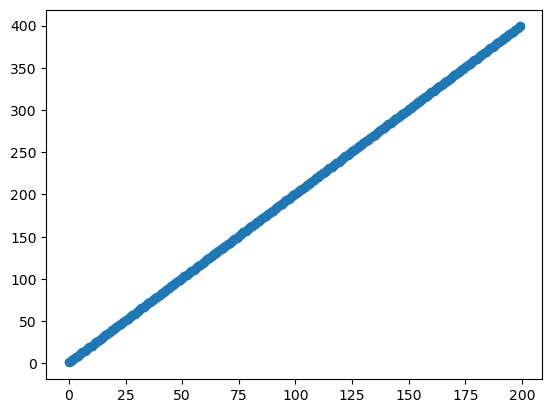

In [8]:
plt.scatter(features , target)

You can see we got a sequence of dots that resembles kind of straight line. 

Lets assume we have a line that tries to capture most of the points on this, like this

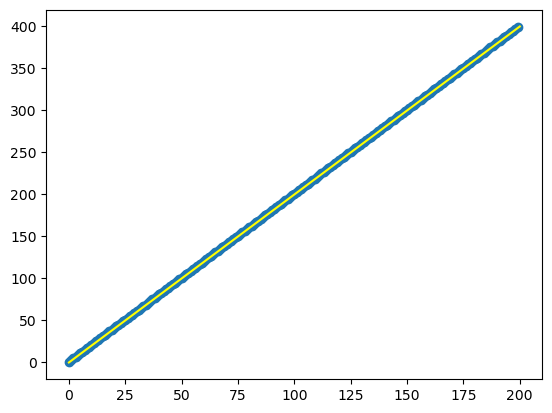

In [9]:
plt.scatter(features , target)
plt.plot([0 , 200] , [0 , 400] , "yellow")

Again by human intution we found the `best fit line`. But what if we want to generalize the things and kind of do not find the best fit line...?

First of all lets get a little bit more deep into equation $y = mx + b$

So what does these terms resembles in this eqution. 
* `m` is the slope of the line

# 2.1 | Slope of A function

Slope of a function shows how steep a function is, or the direction of a function at a given point on the curve.

Lets assume we have this curve $y = 4x^2$ the slope of this curve will be $y = 8x$

In [10]:
IFrame("https://www.desmos.com/calculator/zluqu5vyuh" , 400 , 400)

So how do we calculate the `slope` of a line???

Lets assume we have a function $y = f(x)$,. To find the slope of a function, we simply diffrenctiate the function, thus, the slope of this line will be $y^` = f^`(x)$

# 2.2 | Diffrentiation

Diffrentaition can be explained as getting a small value of a function.

lets assume we have a function `y = sin(x)`

A small strip at that function will demonstrate taking a derivative of that function `sin(x)`

Taking about the function we had taken before that is $y = 4x^2$

Taking its derivative we will get $$y = 8x$$ ($x{n^`} = nx^{n-1}$)

So the slope of $y = 4x^2$ can be represnted as 

In [11]:
IFrame("https://www.desmos.com/calculator/hrguwktg9q" , 400 , 400)

**If you want to know more aboud diffrentiation, here is [3Blue1Brown](https://www.youtube.com/@3blue1brown/featured) => [Essence Of Calculas](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr)**

So now you have a basic idea of `slope`

# 2.3 | Intercept

Now what `b` represents in the data. Usually it is called the `intercept`. Consider this graph of the equation $y = x$ or $y = 1x + b$ 

In [12]:
IFrame("https://www.desmos.com/calculator/gai0veg5fh" , 400 , 400)

This line passes the axis at $(0 , 0)$. These coordinates are called as the `intercepts` of this line. If we make `b` or `intercept` as $1$. The line will then pass from $(1 , -1)$. Basically the `intercept` moves a line in a plane. With that being said, Lets also undertand how the `slope` changes the line. If we make `m` as $2$. The line will rotate anti-clockwise. So as we increase the value of `m` or `slope`. The line moves anti-clockwise, And so the vice-versa, If we decrease the value of `m`, The slope will move in the clockwise direction. 

In short tweeking the values of `m` and `b` or `slope` and `intercept`. We can move the line in any direction and in any way we want `as long as it resembles a straight line`. We still cannot bend the line 

So now we have any data, we just need to difine the values of `slope` and `intercpet`. And we can get the best fit line. But still the question arises how do we generalize the values of these tuning parametes. 

In simple word we can say, How can we find a relation between the data we have and these tuning parameters. So that we only need to define that relationship and then we can easily predict the values.

Lets think that the value assigned to the line is this 

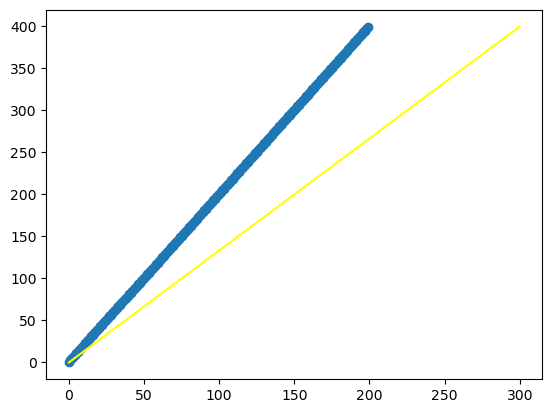

In [13]:
plt.scatter(features , target)
plt.plot([0 , 300] , [0 , 400] , "yellow")

If we test this line on the training data only, we will find that this line is not correct. It is predicting points incorrect, We know that the best fit line we drew first, will predict points wiht lowest incorrect ones. For example the line we just defined if asked the corresponding value of $200$, it will say $250$. But rather it was $400$. There was some `error`, some `loss`, or some `cost` with the `actual` and `predicted` values.

For measuring this loss, what we can do is find the difference between the `actual value` and the `predicted value`. A best fit line will give the lowest value of this difference.

The word difference here is very difficult to say, so we can give this term a new fancy name, which is `The Loss`.

One can deifne loss as $$Loss = actual - predicted$$.

We only took the example of one value. but there are a large group of values. that can show the same trait, For that we can change the formula to 

Lets denote $actual$ as $a$ and $predicted$ as $p$

$$Loss = (a_1 - p_1) + (a_2 - p_2) + (a_3 - p_3) + ... + (a_n - p_n)$$

or $$Loss = \sum\limits_{i = 1}^{n}a_i - p_i$$ or $$Loss = \sum\limits_{i = 1}^{n}(y_i - \hat y_i)$$

Whenever you see $\hat y$, think of it as the `predicted value`

Now lets assume we have data like this and a random line is drawn like this 

<img src = "https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683">

If you look closely, a lot of error terms will tend to cancel out each other. We can also get into a state where the line is `not the best fit`, but still gives $0$ error. With the `Loss` we defined before, we are not chossing a `best fit line`. Rather we are chossing a line that is in the `middle` of those points. One way to counter this is to add a `modulus` function like this $$Loss = \sum\limits_{i = 1}^{n}|y - \hat y|$$

But what is a modulus function. The function is nothing but converts, any negative numbers to postive. For example 
$|-1| = 1$

In [14]:
IFrame("https://www.desmos.com/calculator/kamxotjra2" , 400 , 400)

But there is a problem with this function. A `modulus` is not diffrentiable. You might be thinking that why are we even seeing that part, like we we care for that. Why would you even diffrentiate a loss function. 

We actually diffrentiate loss function in further steps, thats why we will not use the modulus function. 

Another way of doing so is to, square the loss function like this $Loss = (y - \hat y)^2$

Its cool, its good and we can even diffrentiate this...

Now we have a basic idea that we need to compute `m` and `b` for the lowest loss values. Now we should come to know how we can do this 

What if we somehow interelate the `losses` and `m and b`. 

Lets assume we intialize the parameters randomly, like this 

In [15]:
weights = np.random.randn(1)

In [16]:
weights

array([0.01709843])

In [17]:
biases = np.random.randn(1)

In [18]:
biases

array([-0.08193813])

Lets assume we have this value $30$ and we want to predict the corresponding value of this in the `target` array. As our formula says, put the values into this equation $y = mx + b$. or $y = (1.41)(29) + (1.59)$

In [19]:
pred = weights * 30 + biases

In [20]:
pred

array([0.43101466])

And its way far than what we had expected. 

In [21]:
loss = (pred - 60)

In [22]:
loss

array([-59.56898534])

Our main motive is to reduce this loss as much as possible,. 

What if we subtract a small subset of the derivative of this loss from the parameters like this. The derivative of the loss will show us the steepness of the curve, and thus doing so might get us to the valeus of minimum loss. So how do we find the derivative of this function $Loss = (y - \hat y)^2$. What we know is $\hat y = mx + b$. COmputing this value in we get $$Loss = (y - mx - b)^2$$, Now we can diffrentiate the function

## Diffrentiating wrt `b`
$$\frac {dLoss}{db}= \frac {d}{db}(y - mx - b)^2$$
$$= 2(y - mx - b)(-1)$$

## Diffrentiating wrt `m`
$$\frac {dLoss}{dm} = \frac {d}{dm}(y - mx - b)^2$$
$$= 2(y - mx - b)(-x)$$

In [23]:
weights -= (-2* (60 - weights*30 - biases)) * 0.001

In [24]:
biases -= (2 * 30 * (60 - weights * 30 - biases)) * 0.01

And if we then try to predict the values 

In [25]:
print(weights)
print(biases)
loss = (60 - (weights * 30 + biases))
loss

[0.1362364]
[-33.67884586]


array([89.59175395])

Our losses have been decreased, so lets do it again 

In [26]:
weights -= -2 * loss * 0.01
biases -= -2 * 30 * loss * 0.01
print(weights)
print(biases)
loss = (60 - (weights * 30 + biases))
loss

[1.92807148]
[20.07620651]


array([-17.91835079])

In [27]:
weights -= -2 * loss * 0.01
biases -= -2 * 30 * loss * 0.01
print(weights)
print(biases)
loss = (60 - (weights * 30 + biases))
loss

[1.56970446]
[9.32519604]


array([3.58367016])

So now we know if we do this iteratively, we will minimise the loss, and iteratively we will reach the optimal values of `weights` or `m` and `biases` or `m`

Lets say we have runn this again and again for around 100 times 

In [28]:
for _ in range(100):
    weights -= -2 * loss * 0.01
    biases -= -2 * 30 * loss * 0.01
    loss = (60 - (weights * 30 + biases))

Lets now see the weights and biases 

In [29]:
weights

array([1.6294323])

In [30]:
biases

array([11.11703112])

Though we have biases as high, but we have almost achived value of `weights`

Lets do this all again, and now we will also try to plot a graph

In [31]:
weights = abs(np.random.randn(1))
biases = abs(np.random.randn(1))
losses = []
for _ in range(100):
    weights -= -2 * loss * 0.01
    biases -= -2 * 30 * loss * 0.01
    loss = (60 - (weights * 30 + biases))
    losses.append(loss)

<AxesSubplot:>

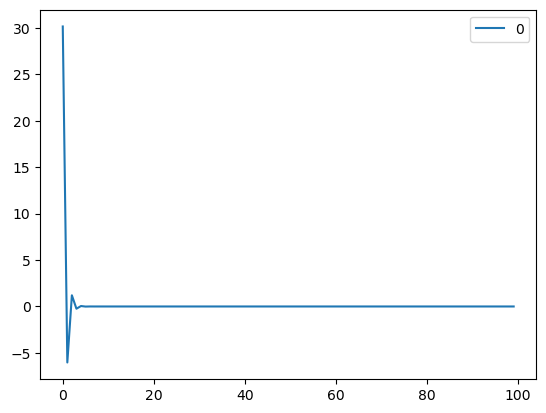

In [32]:
sns.lineplot(np.array(losses))

As we can see we have greatly decreased our losses 

Now we just need to put this all into a function 

In [33]:
def SGDRegressor():
    weights = abs(np.random.randn(1))
    biases = abs(np.random.randn(1))
    predic = []
    losses = []
    for _ in range(300):
        pred = weights * features + biases
        loss = np.sum((pred - target) ** 2)
        losses.append(loss)
        weights -= -2 * loss * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

# 3 | Functionalities
We have made out our **SGDRegressor**, now we need to add some functionalities to it. We can get funcitonalites form **[Scikit-Learn](https://scikit-learn.org/)=>[Stable](https://scikit-learn.org/stable/)=>[Linear Model](https://scikit-learn.org/stable/modules/linear_model.html)=>[SGD Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)**

* ✅List Of columns
* ✅`loss : str, default=’squared_error’` - The loss function to be used. The possible values are `‘squared_error’`, `‘huber’`, `‘epsilon_insensitive’`, or `‘squared_epsilon_insensitive’`. 
* * ✅The `‘squared_error’` refers to the ordinary least squares fit. 
* * ✅`‘huber’` modifies `‘squared_error’` to focus less on getting outliers correct by switching from squared to linear loss past a distance of `epsilon`. 
* * ✅`‘epsilon_insensitive’` ignores errors less than epsilon and is linear past that; this is the loss function used in SVR. `‘squared_epsilon_insensitive’` is the same but becomes squared loss past a tolerance of epsilon.
* ✅`alpha : float, default=0.0001` - Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to `learning_rate` is set to ‘optimal’.
* ✅`fit_intercept : bool, default=True` - Whether the intercept should be estimated or not. If False, the data is assumed to be already centered.
* ✅`max_iter : int, default=1000` - The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the `partial_fit` method.
* ✅`shuffle : bool, default=True` - Whether or not the training data should be shuffled after each epoch.
* ✅`epsilon : float, default=0.1` - Epsilon in the epsilon-insensitive loss functions; only if `loss` is ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’. For ‘huber’, determines the threshold at which it becomes less important to get the prediction exactly right. For epsilon-insensitive, any differences between the current prediction and the correct label are ignored if they are less than this threshold.
* ✅`early_stopping : bool, default=False` - Whether to use early stopping to terminate training when validation score is not improving. If set to True, it will automatically set aside a fraction of training data as validation and terminate training when validation score returned by the score method is not improving by at least tol for n_iter_no_change consecutive epochs.
* ✅`validation_fraction : float, default=0.1` - The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if `early_stopping` is True.

# 3.1 | List Of Columns 

This function will only work if there are only $2$ columns, one `feature` and the other one `target`. What if the user gives out a list of columns. For this we nee dto take two different arguemnts form the user and work on them differently

In [34]:
def SGDRegressor(X , y):
    
    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        weights -= -2 * loss * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

# 3.2 | Losses 

First of all we need to understand more about losses. 

# 3.2.1 | Squared Loss

* * `squared_loss` - is just the loss we just created which is also called `Ordinary Least Sqaures`. which we had already implemented. for making it more easieir to use, lets just use a helper function, and just transfer some things there 

In [35]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def SGDRegressor(X , y):
    
    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        
        loss = squared_mean(pred , y)
        losses.append(loss)
        
        weights -= -2 * loss * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

Now it will be easier to use different tyoes of losses, now we will just need to define the loss functions and define which one to use.

# 3.2.2 | Huber Loss

Our second one is `huber`. So what is this huber loss...?
 
Lets assume we have a data like this  

In [36]:
features = np.array([x for x in range(20)])
target = []
for i in range(20):
    if i < 4 : 
        target.append(i ** (1 / 10))
    else : 
        target.append(i ** (1 / 2))
target = np.array(target)

In [37]:
features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [38]:
target

array([0.        , 1.        , 1.07177346, 1.11612317, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ,
       3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739,
       3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894])

If we try to plot this, we get this 

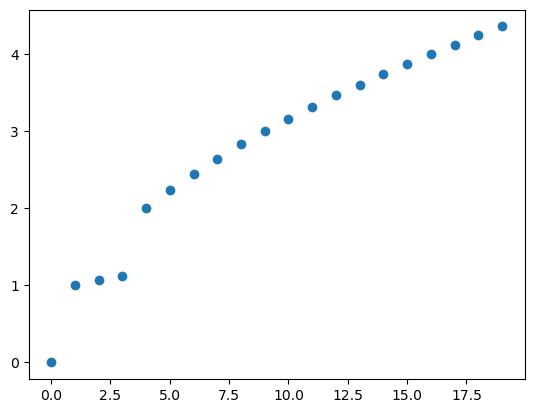

In [39]:
plt.scatter(features , target)

If we try to plot a line that fits thew best for this line, we can do something like this 

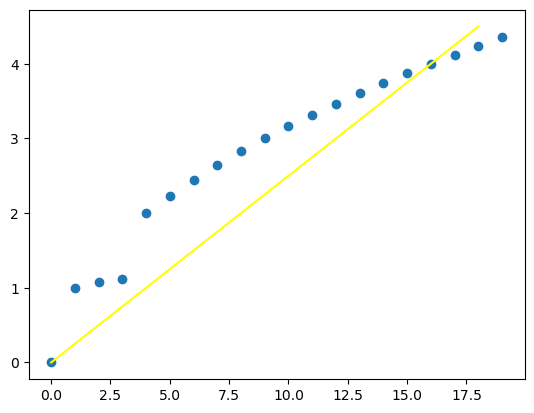

In [40]:
plt.scatter(features , target)
plt.plot([0 , 18] , [0, 4.5] , "yellow")

It should loos something like this.

But there is a problem with this guy, he had distorted himself, because of the **outliers**, and thus is not a very good line. To balanace this what we can use is `Mean Absolute Error` instead `Mean Sqaured Loss`. So what is this `Mean Absolute Error`...? 

`Mean Absolute Error` is just like the lost brother of `Mean Sqaured Error`. Its formula is same but with a small tweek 

$$Loss = |y - \hat y|$$

You might be thinking that we suggested this loss before and this was not good one, because it was not diffrentiable, so what now...???

Guess what, we found a way to find the alternative, for other losses we compute the gradients as a whole, for this, we find sub-gradients and move on with life. 

But there is problem with this type of loss too

Lets try to plot a line we get from this 

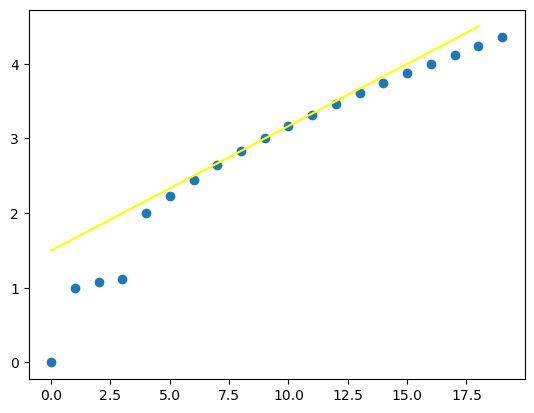

In [41]:
plt.scatter(features , target)
plt.plot([0 , 18] , [1.5, 4.5] , "yellow")

You will say that this will do predictions really great for the major points, and will just ignore the outliers, which is a good point. But lets assume we have a greater amount of outliers. 

In [42]:
features = np.array([x for x in range(20)])
target = []
for i in range(20):
    if i < 6 : 
        target.append(i ** (1 / 10))
    else : 
        target.append(i ** (1 / 2))
target = np.array(target)

In [43]:
features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [44]:
target

array([0.        , 1.        , 1.07177346, 1.11612317, 1.14869835,
       1.17461894, 2.44948974, 2.64575131, 2.82842712, 3.        ,
       3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739,
       3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894])

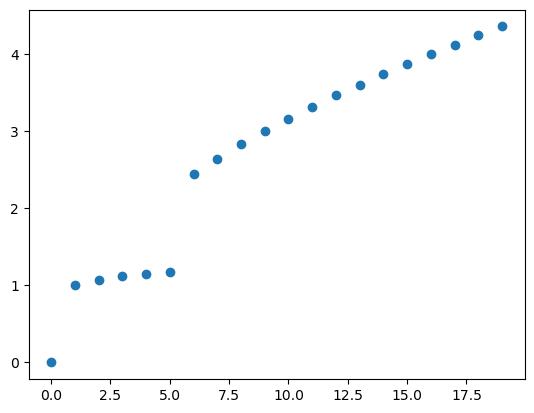

In [45]:
plt.scatter(features , target)

If we choose the `Mean Absolute Error`, the line will be something like this 

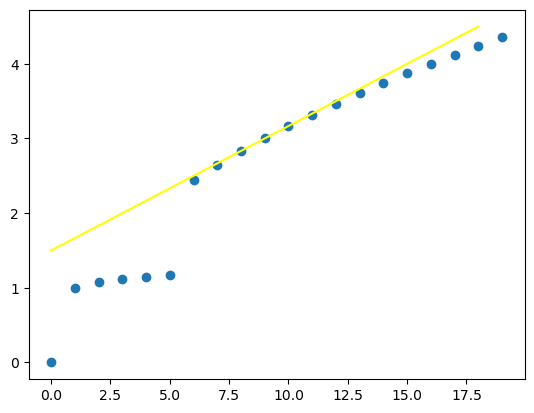

In [46]:
plt.scatter(features , target)
plt.plot([0 , 18] , [1.5, 4.5] , "yellow")

But at this point the amount of outliers have risen up so much that they are no more outliers, they have their own community and maybe goverment.So how do we handle this...?

If we use `Mean Sqaured Error`, it will focus on the lower points more than the above points, and if we choose the `Mean Absolute Error`, it will focus on the upper points more than the above points. To counter this type of problem what we use is the combination of these two losses. Something like this $$Loss = \Bigg [ \frac {\frac {1}{2}(y - \hat y)^2}{\delta|y - \hat y| - \frac {1}{2}\delta^2}\frac {...if...}{...if...}\frac {y - \hat y|<=\delta}{|y - \hat y|>\delta}$$

But what is $\delta$ doing here..?

This is a actually a hyperparameter usually having the value as $0.2$. 

Now as we know about the huber loss lets try to implement this 

In [47]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals):
    loss = 0
    for pred , act in zip(predictions , actuals):
        if abs(pred - act) <= 0.2:
            loss += (1 / 2) * pred - act
        else :
            loss += (0.2 * abs(pred - act)) - ((1 / 2) * (0.2 ** 2))
    return loss

def SGDRegressor(X , y , loss = "sqaured_mean"):
    
    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        if loss == "sqaured_mean":
            loss = squared_mean(pred , y)
        else : 
            loss = huber(pred , y)
        losses.append(loss)
        
        weights -= -2 * loss * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

And we just implemented `The Huber Loss`. We have the value of $\delta$ as by defualt, lets make it as an hyperparameter instead 

In [48]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):
    loss = 0
    for pred , act in zip(predictions , actuals):
        if abs(pred - act) <= delta:
            loss += (1 / 2) * pred - act
        else :
            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))
    return loss

def SGDRegressor(X , y , loss = "sqaured_mean" , delta = 0.2):
    
    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        if loss == "sqaured_mean":
            loss = squared_mean(pred , y , delta)
        else : 
            loss = huber(pred , y)
        losses.append(loss)
        
        weights -= -2 * loss * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

# 3.2.3 | Epsilon Intensive 

This is a type of baseline loss, it generates a lower cap for the loss, it ignores the loss below the `epsilon` value. 

Its default value is $0$.

Now lets try to make tweeks to our functions

In [49]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):
    loss = 0
    for pred , act in zip(predictions , actuals):
        if abs(pred - act) <= delta:
            loss += (1 / 2) * pred - act
        else :
            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))
    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y , loss_type = "sqaured_mean" , delta = 0.2 , epsilon = 0):
    
    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        if loss_type == "sqaured_mean":
            loss = squared_mean(pred , y , delta)
        elif loss_type == "huber" : 
            loss = huber(pred , y)
        else :
            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)
        
        weights -= -2 * loss * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

And we just implemented our differnet losses for the `SGD Regressor`

# 3.3 | Alpha

You remeber we were taking a small part of the loss, not the whole loss. The parameter that defines how much loss we are taking is called the **alpha** , also called as the learning rate. 

You might be thinking that it is not that important, but it is really important concept, a higher learning rate has a high chance that you will never converge to the model, a low very low learning rate means that you will take a very long time to converge for the model 

Here is a very good image that explains the importance of the learning rate 

<img src = "https://www.researchgate.net/profile/Hajar-Feizi/publication/341609757/figure/fig2/AS:894745802977280@1590335431623/Changes-in-the-loss-function-vs-the-epoch-by-the-learning-rate-40.png">

It will be really easy for us to apply this functinality, we just need to change some varaibales

In [50]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):
    
    loss = 0
    
    for pred , act in zip(predictions , actuals):
    
        if abs(pred - act) <= delta:
        
            loss += (1 / 2) * pred - act
        
        else :
        
            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))
    
    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y , loss_type = "sqaured_mean" , delta = 0.2 , epsilon = 0 , alpha = 0.0001):
    
    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
    
        if loss_type == "sqaured_mean":
        
            loss = squared_mean(pred , y , delta)
        
        elif loss_type == "huber" : 
            
            loss = huber(pred , y)
        
        else :
        
            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)
        
        weights -= -2 * loss * alpha
        biases -= -2 * 30 * loss * alpha

    return weights , biases

# 3.4 | Fit_Intercept
Lets assume we have a data that is centered, means there is a very low chance that its $\beta$ or $intercept$ will be non-zero. So we can save some computation and time by not calculating the $\beta$ everytime, Yes we are greedy. This parameter decides whether the $\beta$ should be calculated or not 

In [51]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):
    
    loss = 0
    
    for pred , act in zip(predictions , actuals):
    
        if abs(pred - act) <= delta:
        
            loss += (1 / 2) * pred - act
        
        else :
        
            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))
    
    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y , 
                 loss_type = "sqaured_mean" , delta = 0.2 , 
                 epsilon = 0 , alpha = 0.0001 , 
                fit_intercept = True):
    
    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(1)
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
    
        if loss_type == "sqaured_mean":
        
            loss = squared_mean(pred , y , delta)
        
        elif loss_type == "huber" : 
            
            loss = huber(pred , y)
        
        else :
        
            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)
        
        weights -= -2 * loss * alpha
        if fit_intercept:
            biases -= -2 * 30 * loss * alpha

    return weights , biases

# 3.5 | Max_Iter 

This is the number of times we will run the function. Previously we were running for $300$ times. Now we can add that as a functionality to our code and make it a hyperparameter instead 

In [52]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):
    
    loss = 0
    
    for pred , act in zip(predictions , actuals):
    
        if abs(pred - act) <= delta:
        
            loss += (1 / 2) * pred - act
        
        else :
        
            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))
    
    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y , 
                 loss_type = "sqaured_mean" , delta = 0.2 , 
                 epsilon = 0 , alpha = 0.0001 , 
                fit_intercept = True , max_iter = 1000):
    
    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(1)
    
    predic = []
    losses = []
    
    for _ in range(max_iter):
    
        pred = weights * features + biases
    
        if loss_type == "sqaured_mean":
        
            loss = squared_mean(pred , y , delta)
        
        elif loss_type == "huber" : 
            
            loss = huber(pred , y)
        
        else :
        
            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)
        
        weights -= -2 * loss * alpha
        if fit_intercept:
            biases -= -2 * 30 * loss * alpha

    return weights , biases

# 3.6 | Shuffle 
Suffling is a good practice in some cases as it can save the loss from overfitting of the data , we can do this directly by `np.random.shuffle()`

In [53]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):
    
    loss = 0
    
    for pred , act in zip(predictions , actuals):
    
        if abs(pred - act) <= delta:
        
            loss += (1 / 2) * pred - act
        
        else :
        
            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))
    
    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y , 
                 loss_type = "sqaured_mean" , delta = 0.2 , 
                 epsilon = 0 , alpha = 0.0001 , 
                fit_intercept = True , max_iter = 1000 , 
                shuffle = False ):
    
    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(1)
    
    predic = []
    losses = []
    
    for _ in range(max_iter):
        if shuffle :
            X = np.random.shuffle(x)
    
        pred = weights * X + biases
    
        if loss_type == "sqaured_mean":
        
            loss = squared_mean(pred , y , delta)
        
        elif loss_type == "huber" : 
            
            loss = huber(pred , y)
        
        else :
        
            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)
        
        weights -= -2 * loss * alpha
        if fit_intercept:
            biases -= -2 * 30 * loss * alpha

    return weights , biases

# 3.7 | Early Stopping

Suppose you have achieved convergence at `iter` $69$ , but your `max_iter` is set to $10^{69}$, so after convergence you will just be wasting your time and comoutation power. So it would be really great if we stop at a threshold value, but how can we assure that we have reached a threshold value, one way is that to see if the loss is not changing for $2$ consecutive iterations. We can do this by comparing the loss we have and the loss we had before 

In [54]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):
    
    loss = 0
    
    for pred , act in zip(predictions , actuals):
    
        if abs(pred - act) <= delta:
        
            loss += (1 / 2) * pred - act
        
        else :
        
            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))
    
    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y , 
                 loss_type = "sqaured_mean" , delta = 0.2 , 
                 epsilon = 0 , alpha = 0.0001 , 
                fit_intercept = True , max_iter = 1000 , 
                shuffle = False , early_stopping = False):
    
    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(1)
    
    predic = []
    losses = []
    
    for epochs in range(max_iter):
        if shuffle :
            X = np.random.shuffle(x)
    
        pred = weights * X + biases
    
        if loss_type == "sqaured_mean":
        
            loss = squared_mean(pred , y , delta)
        
        elif loss_type == "huber" : 
            
            loss = huber(pred , y)
        
        else :
        
            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)
        if early_stopping: 
            if losses[epochs] == losses[epochs - 1]:
                break
        weights -= -2 * loss * alpha
        if fit_intercept:
            biases -= -2 * 30 * loss * alpha

    return weights , biases

# 4 | SGDRegressor Final Source Code From Scratch 

In [55]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):
    
    loss = 0
    
    for pred , act in zip(predictions , actuals):
    
        if abs(pred - act) <= delta:
        
            loss += (1 / 2) * pred - act
        
        else :
        
            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))
    
    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y , 
                 loss_type = "sqaured_mean" , delta = 0.2 , 
                 epsilon = 0 , alpha = 0.0001 , 
                fit_intercept = True , max_iter = 1000 , 
                shuffle = False , early_stopping = False):
    
    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(1)
    
    predic = []
    losses = []
    
    for epochs in range(max_iter):
        
        if shuffle :
        
            X = np.random.shuffle(x)
    
        pred = weights * X + biases
    
        if loss_type == "sqaured_mean":
        
            loss = squared_mean(pred , y , delta)
        
        elif loss_type == "huber" : 
            
            loss = huber(pred , y)
        
        else :
        
            loss = epsilon_intensie(pred , y , epsilon)
        
        losses.append(loss)
        
        if early_stopping: 
            
            if losses[epochs] == losses[epochs - 1]:
                
                break
        
        weights -= -2 * loss * alpha
        
        if fit_intercept:
            
            biases -= -2 * 30 * loss * alpha

    return weights , biases

Now we will try to make the same with **[Pytorch](https://pytorch.org/)**

# 5 | SGD Regressor Pytorch

In [56]:
import torch 
import torch.nn as nn 

As we have created a enough part of our `SGDRegressor` now we can make the same with `pytorch`. As we know the basic working of the `SGDRegressor`, lets try to list it 
* **Optimise the Data**
* **Intialize Random Parameters**
* **Predict with the Parameters**
* **Calculate the Loss(have different methods)**
* **Calculate the Loss Derivative**
* **Update the Parameters According to the Loss Derivatives**
* **Repeat Step 3**

# 5.1 | Optimise the Data
It is very important to `optimise` the data before sending it to the `model`. As we are training a `pytorch model` we need to give it a `pytorch object`. There are majorly two ways to do so **[pytorch.tensor()](https://pytorch.org/docs/stable/tensors.html)**  and **[pytorch.as_tensor()](https://pytorch.org/docs/stable/generated/torch.as_tensor.html)**. There is great explaination related to the difference I found on **[Best way to convert a list to tensor?](https://discuss.pytorch.org/t/best-way-to-convert-a-list-to-a-tensor/59949)**

Basically it says that 

|`pytroch.tensor()`|`pytroch.as_tensor()`
|---|---|
|Make a copy of the data and then do the operations|Avoids making a copy and try to do operations in the data itself|

In [57]:
[x for x in range(100)]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [58]:
sample_list = [x for x in range(100)]

The data type of this data structure will be 

In [59]:
type(sample_list)

list

But we need a `torch.Tensor`, for that 

In [60]:
torch.tensor(sample_list)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [61]:
sample_list = torch.tensor(sample_list)

And the datatype of this datastructure 

In [62]:
type(sample_list)

torch.Tensor

Lets just try to use $2$ features this time 

In [63]:
fea = np.array([[x for x in range(200)] , 
               [x for x in range(200)]])
target = np.array([x for x in range(200)])
fea = torch.as_tensor(fea , dtype =torch.float32)
target = torch.as_tensor(target , dtype = torch.float32)

# 5.2 | Intialize Random Variables 

Now its time to initalize random variables, we know by variables we mean `weights` and `biases`, There will be $1$ bais and `X.shape[1]` weights. In `pytorch` we use the **[pytorch.nn.Linear()](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)**

Here we just need to pass the number of input features `in_features` and number of output features `out_features`. In our case the `in_features` will be `X.shape[0]` and `out_features` will be `1`

In [64]:
nn.Linear(fea.shape[0] , 1)

Linear(in_features=2, out_features=1, bias=True)

In [65]:
model = nn.Linear(fea.shape[0] , 1)

We can actually see the weights and biases 

In [66]:
model.weight

Parameter containing:
tensor([[-0.6114, -0.5669]], requires_grad=True)

In [67]:
model.bias

Parameter containing:
tensor([-0.6356], requires_grad=True)

# 5.3 | Predicting with the Parameters

Now we need to make predictions with the model we made. We can do this by using **[pytorch.nn.Linear()(X)](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)**

**This will throw an error**
```
In[0] : predicted = model(fea)
Out[0] : ---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
/tmp/ipykernel_27/3354294725.py in <module>
----> 1 predicted = model(fea)

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/module.py in _call_impl(self, *input, **kwargs)
   1188         if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks or _global_backward_hooks
   1189                 or _global_forward_hooks or _global_forward_pre_hooks):
-> 1190             return forward_call(*input, **kwargs)
   1191         # Do not call functions when jit is used
   1192         full_backward_hooks, non_full_backward_hooks = [], []

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x100 and 2x1)
```
This is beause we are trying to multiply arrays of different datatypes. To counter this we need to transpose our array 

In [68]:
predicted = model(fea.mT)

In [69]:
predicted

tensor([[  -0.6356],
        [  -1.8140],
        [  -2.9924],
        [  -4.1708],
        [  -5.3491],
        [  -6.5275],
        [  -7.7059],
        [  -8.8843],
        [ -10.0626],
        [ -11.2410],
        [ -12.4194],
        [ -13.5978],
        [ -14.7762],
        [ -15.9545],
        [ -17.1329],
        [ -18.3113],
        [ -19.4897],
        [ -20.6680],
        [ -21.8464],
        [ -23.0248],
        [ -24.2032],
        [ -25.3815],
        [ -26.5599],
        [ -27.7383],
        [ -28.9167],
        [ -30.0951],
        [ -31.2734],
        [ -32.4518],
        [ -33.6302],
        [ -34.8086],
        [ -35.9869],
        [ -37.1653],
        [ -38.3437],
        [ -39.5221],
        [ -40.7004],
        [ -41.8788],
        [ -43.0572],
        [ -44.2356],
        [ -45.4140],
        [ -46.5923],
        [ -47.7707],
        [ -48.9491],
        [ -50.1275],
        [ -51.3058],
        [ -52.4842],
        [ -53.6626],
        [ -54.8410],
        [ -56

# 5.4 | Calculating the Loss
Now we need to define the loss, here we will be only using `MSELoss`, we will be adding more losses further

In [70]:
nn.MSELoss()

MSELoss()

In [71]:
sample_loss = nn.MSELoss()

In [72]:
loss = sample_loss(predicted , target)

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [73]:
loss

tensor(55217.5664, grad_fn=<MseLossBackward0>)

# 5.5 | The Loss Derivative
Now we need to compute the loss derivative.  We can do this by **[pytorch.tensor.backward()](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html)**
We will be using `retain_graph = True` because not doing so will free the tensor we need 

In [74]:
loss.backward(retain_graph = True)

# 5.6 | Update the Parameters
We now need to update the parameters . We can do by first defining the type of optimizer we want to use by using **[pytorch.nn.optim.SGD()](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)**

In [75]:
torch.optim.SGD(model.parameters() , lr = 0.01)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [76]:
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

Now we can update the parameters by using **[pytorch.optim.optimizer.step()](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html)**

In [77]:
optimizer.step()

# 5.7 | Repeat 
Now we need to repeat these steps for some `max_iter`, to minimise the loss 

In [78]:
for epoch in range(100):
    predicted = model(fea.mT)
    losses.append(loss.detach().numpy())
    loss.backward(retain_graph = True)
    optimizer.step()

Now we just need to put all of this into a function 

# 6 | SGDRegressor Pytroch Final Source Code

In [79]:
def SGDR_pytorch(X , y):
    model = nn.Linear(X.shape[0] , 1)
    optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)
    for _ in range(100):
        predicted = model(X)
        loss = sample_loss(predicted , y)
        loss.backward(retain_graph = True)
        optimizer.step()
    return model().detach().numoy()

**THIS IS NOT THE FULL IMPLEMENTATION, IT STILL LACKS MANY FUNCTIONALITIES AND IS VULENRABLE TO MANY EDGE CASES, WE WILL IMPROVE THIS IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE :)**

**PEACE OUT !!!**